In [7]:
import pandas as pd
import pendulum
import matplotlib.pyplot as plt

df = pd.read_csv('/Users/thomas/Downloads/european_wholesale_electricity_price_data_hourly/Belgium.csv')
df['Datetime (Local)'] = pd.to_datetime(df['Datetime (Local)'])

dates_temp = [pendulum.datetime(x.year, x.month, x.day, x.hour, x.minute, tz='Europe/Brussels') for x in list(df['Datetime (Local)'])]
dates_temp = [x for x in dates_temp if x >= pendulum.datetime(2024, 9, 1, tz='Europe/Brussels')]
offset = len(list(df['Price (EUR/MWhe)'])) - len(dates_temp)
hour_start_s = [int(x.timestamp()) for x in dates_temp]

bel_prices = {
    'hour_start_dt': [str(x) for x in dates_temp],
    'hour_start_s': hour_start_s,
    'eur_mhw': list(df['Price (EUR/MWhe)'][offset:])
}

df_cropped = pd.DataFrame(bel_prices).reset_index(drop=True)
display(df_cropped)

# bel_prices['hour_start_datetime'] = [pendulum.parse(dt) for dt in df['Datetime (Local)']]

# cropped_hours = [x for x in bel_prices['hour_start_datetime'] if x >= pendulum.datetime(2024, 9, 1)]
# offset = len(bel_prices['hour_start_datetime']) - len(cropped_hours)
# cropped_prices = bel_prices['eur_mhw'][offset:]

# df_cropped = pd.DataFrame({
#     'hour_start_s': [int(x.timestamp()) for x in cropped_hours],
#     'hour': cropped_hours,
#     'price': cropped_prices
# }).reset_index(drop=True)

# display(df_cropped)

# plt.figure(figsize=(12,3))
# plt.plot(cropped_hours, cropped_prices)
# plt.show()


,hour_start_dt,hour_start_s,eur_mhw
0,2024-09-01 00:00:00+02:00,1725141600,93.93
1,2024-09-01 01:00:00+02:00,1725145200,85.99
2,2024-09-01 02:00:00+02:00,1725148800,80.37
3,2024-09-01 03:00:00+02:00,1725152400,74.19
4,2024-09-01 04:00:00+02:00,1725156000,68.22
...,...,...,...
5531,2025-04-19 18:00:00+02:00,1745078400,85.05
5532,2025-04-19 19:00:00+02:00,1745082000,103.77
5533,2025-04-19 20:00:00+02:00,1745085600,114.67
5534,2025-04-19 21:00:00+02:00,1745089200,116.83


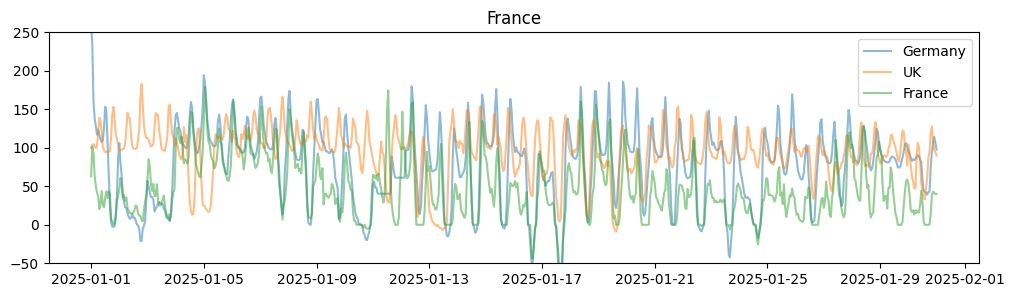

In [2]:
def get_prices(country):
    df = pd.read_csv(f'/Users/thomas/Downloads/european_wholesale_electricity_price_data_hourly/{country}.csv')

    ger_prices = {
        'hour_start': df['Datetime (Local)'],
        'eur_mhw': df['Price (EUR/MWhe)']
    }
    ger_prices['hour_start_datetime'] = [pendulum.parse(dt) for dt in df['Datetime (Local)']]
    cropped_hours = [
        x for x in ger_prices['hour_start_datetime'] 
        if x >= pendulum.datetime(2025, 1, 1) 
        and x <= pendulum.datetime(2025, 1, 31)
        ]
    offset = len(ger_prices['hour_start_datetime']) - len(cropped_hours)
    cropped_prices = ger_prices['eur_mhw'][offset:]
    df_cropped = pd.DataFrame({
        'hour': cropped_hours,
        'price': cropped_prices
    }).reset_index(drop=True)
    return df_cropped

germany = get_prices('Germany')
uk = get_prices('United Kingdom')
france = get_prices('France')

plt.figure(figsize=(12,3))
plt.plot(germany['hour'], germany['price'], alpha=0.5, label='Germany')
plt.title('Germany')
plt.ylim([-50,250])
# plt.show()

# plt.figure(figsize=(12,3))
plt.plot(uk['hour'], uk['price'], alpha=0.5, label='UK')
plt.ylim([-50,250])
plt.title('UK')
# plt.show()

# plt.figure(figsize=(12,3))
plt.plot(france['hour'], france['price'], alpha=0.5, label='France')
plt.ylim([-50,250])
plt.title('France')
plt.legend()
plt.show()